# Generalisation

## Machine Learning and Adaptive Intelligence

### Mauricio Álvarez 

### Based on slides by Neil D. Lawrence


### Review
- Last time: introduced basis functions.
- Showed how to maximize the likelihood of a non-linear model that's linear in parameters.
- Explored the different characteristics of different basis function models

### Training data and test data (I)

- When you split your data into training data and test data, you should avoid snooping on the test data. 


- You should only use your test data when you have finished designing your predictive model.  

### Training data and test data (II)

- My advice is: put always yourself in the situation where you will deploy your system and the system will run free.


- Your model will need to deal with a data that has not been preprocessed at all, for example. 


- Your test data should reflect this scenario as close as possible.  

### You can use your training data as you please (I)

- Your traininig data is your resource. It is what you actually use to get your predictive model running.


- So, make a good use of it. 


- For example, you can further divide the training data into a traininig set and a validation set. 

### You can use your training data as you please (II)

- We use this idea to, for example, 
    - choose a model among a competing set of models 
    - fix parameters of the objective function.


- Once you have made a decision about which is 
    - the best model 
    - the best parameters to use in the objective function, 

go back and use ALL the training data to fit the winning model or to optimise the objective function with the parameters selected.

### You can use your training data as you please

- We use this idea to, for example, choose a model among a competing set of models or fix parameters of the objective function.


- Once you have made a decision about which is the best model or the best parameters to use on your validation set, go back and use ALL the training data to fit the winning model or to optimise the objective function with the parameters selected.

### Training, validation and test


<img src="diagrams/train_val_test.png" width="800" height="200" align=center>



### Bias Variance Decomposition

- Suppose that the data $y$ comes from $y = f^*(\mathbf{x}) + \epsilon$, where $\epsilon \sim \mathcal{N}(0,\sigma^2)$.


- $f^*(\mathbf{x})$ is the true underlying function, but it is unknown. 


- We find a function $f(\mathbf{x})$ that approximates $f^*(\mathbf{x})$ as close as possible.

### Bias Variance Decomposition

The data is sampled from an unknow distribution $P(\mathbf{x}, y)$. The expected *test error* follows as

$$\mathbb{E}\left[ (y - f(\mathbf{x}))^2 \right]$$

Decompose as

$$\mathbb{E}\left[ (y - f(\mathbf{x}))^2 \right] = \text{bias}\left[f(\mathbf{x})\right]^2 + \text{variance}\left[f(\mathbf{x})\right] +\sigma^2,$$

where 

$$\text{bias}\left[f(\mathbf{x})\right] = \mathbb{E}\left[f(\mathbf{x})\right] - f^*(\mathbf{x})$$

 $$\text{variance}\left[f(\mathbf{x})\right] = \mathbb{E}\left[\left(f(\mathbf{x}) -  \mathbb{E}\left[f(\mathbf{x})\right]\right)^2\right]$$


### Bias

- Given by
    $$\text{bias}\left[f(\mathbf{x})\right] = \mathbb{E}\left[f(\mathbf{x})\right] - f^*(\mathbf{x})$$
    
- Error due to bias comes from a model that's too simple.

### Variance

- Given by
    $$\text{variance}\left[f(\mathbf{x})\right] = \mathbb{E}\left[\left(f(\mathbf{x}) -  \mathbb{E}\left[f(\mathbf{x})\right]\right)^2\right]$$
    
    
- Slight variations in the training set cause changes in the prediction. Error due to variance is error in the model due to an overly complex model. 

### Further reading

- You can read section 3.2 on Bishop (2006) for more details. 


- The paper "Neural Networks and the Bias/Variance Dilemma" by Geman et al (1992) has a detailed analysis of this trade-off in Neural Networks.

### Polynomial Fits to Olympics Data


In [1]:
import pods
import numpy as np
import scipy as sp
import mlai
from matplotlib import pyplot as plt
import teaching_plots as plot
%matplotlib inline

from ipywidgets import *
def display_plots(filebase, directory=None, width=700, height=500, **kwargs):
    """Display a series of plots controlled by sliders. The function relies on Python string format functionality to index through a series of plots."""
    def show_figure(filebase, directory, **kwargs):
        """Helper function to load in the relevant plot for display."""
        filename = filebase.format(**kwargs)
        if directory is not None:
            filename = directory + '/' + filename           
        display(HTML("<img src='{filename}'>".format(filename=filename)))
        
    interact(show_figure, filebase=fixed(filebase), directory=fixed(directory), **kwargs)

In [2]:
max_basis = 10
basis = mlai.polynomial

data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

data_limits = [1892, 2020]
num_data = x.shape[0]

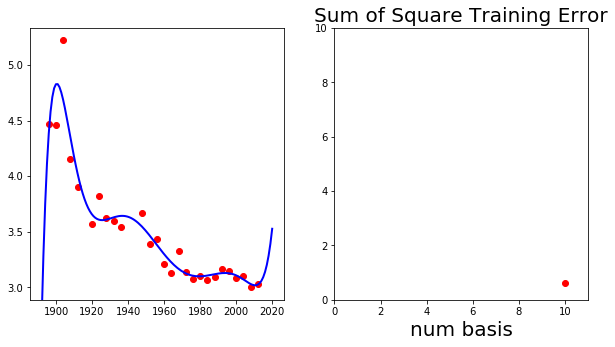

In [3]:
plot.rmse_fit(x, y, param_name='num_basis', param_range=(1, max_basis+1), 
              model=mlai.LM, basis=basis, data_limits=data_limits, 
              xlim=data_limits, objective_ylim=[0, 10])

In [4]:
display_plots('olympic_LM_polynomial_num_basis{num_basis:0>3}.svg', 
                            directory='./diagrams', num_basis=(1, max_basis))

interactive(children=(IntSlider(value=5, description='num_basis', max=10, min=1), Output()), _dom_classes=('wi…

### Overfitting

- Increased number of basis functions we obtain a better 'fit' to the data.

- How will the model perform on previously unseen data?

- Let's consider predicting the future.

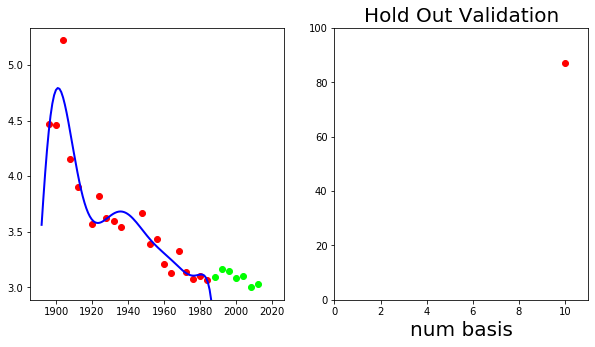

In [5]:
plot.holdout_fit(x, y, param_name='num_basis', 
                 param_range=(1, max_basis+1), 
                 model=mlai.LM, basis=basis, data_limits=data_limits,
                 permute=False, objective_ylim=[0, 100], xlim=data_limits)

### Extrapolation

- Here we are training beyond where the model has learnt.
- This is known as *extrapolation*.
- Extrapolation is predicting into the future here, but could be:
    - Predicting back to the unseen past (pre 1892)
    - Spatial prediction (e.g. Cholera rates outside Manchester given rates inside Manchester).

### Alan Turing
- He was a formidable Marathon runner. 
- In 1946 he ran a time 2 hours 46 minutes.
- What is the probability he would have won an Olympics if one had been held in 1946?  
![Alan Turing, Times in the Times](http://www.turing.org.uk/turing/pi2/times2.gif)![Alan Turing running in 1946](http://www.turing.org.uk/turing/pi2/run.jpg)
<center>*Alan Turing, in 1946 he was only 11 minutes slower than the winner of the 1948 games. Would he have won a hypothetical games held in 1946? Source: [Alan Turing Internet Scrapbook](http://www.turing.org.uk/scrapbook/run.html).*</center>


### Interpolation
- Predicting the wining time for 1946 Olympics is *interpolation*.
- This is because we have times from 1936 and 1948.
- If we want a model for *interpolation* how can we test it?
- One trick is to sample the validation set from throughout the data set.

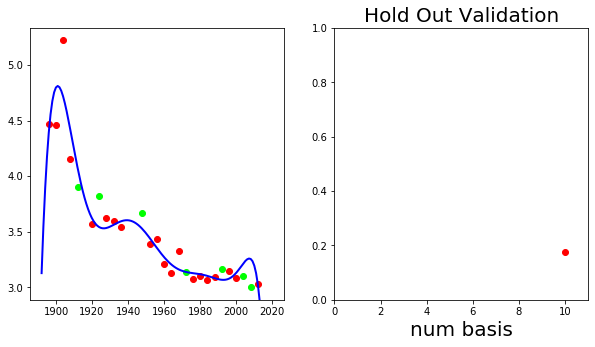

In [6]:
plot.holdout_fit(x, y, param_name='num_basis', param_range=(1, max_basis+1), 
                 model=mlai.LM, basis=basis, data_limits=data_limits, 
                 xlim=data_limits, prefix='olympic_val_inter', objective_ylim=[0.0, 1.], permute=True)

In [7]:
display_plots('olympic_val_inter_LM_polynomial_num_basis{num_basis:0>3}.svg', 
                            directory='./diagrams', num_basis=(1, max_basis))

interactive(children=(IntSlider(value=5, description='num_basis', max=10, min=1), Output()), _dom_classes=('wi…

### Choice of Validation Set

- The choice of validation set should reflect how you will use the model in practice.
- For extrapolation into the future we tried validating with data from the future.
- For interpolation we chose validation set from data.
- For different validation sets we could get different results.

### Leave One Out Error
- Take training set and remove one point.
- Train on the remaining data.
- Compute the error on the point you removed (which wasn't in the training data).
- Do this for each point in the training set in turn.
- Average the resulting error. 
- This is the leave one out error.

In [8]:
#plot.loo_fit(x, y, param_name='num_basis', param_range=(1, max_basis+1),  
#             model=mlai.LM, basis=basis, data_limits=data_limits, 
#             xlim=data_limits, objective_ylim=[0., 2.], prefix='olympic_loo')

In [9]:
display_plots('olympic_loo{part:0>3}_LM_polynomial_num_basis{num_basis:0>3}.svg', 
                            directory='./diagrams', num_basis=(1, max_basis), part=(0,x.shape[0]-1))

interactive(children=(IntSlider(value=5, description='num_basis', max=10, min=1), IntSlider(value=13, descript…

### $k$ Fold Cross-Validation

- Leave one out error can be very time consuming.

- Need to train your algorithm $n$ times.

- An alternative: $k$ fold cross validation.

### $k$ Fold Cross-Validations

<img src="diagrams/grid_search_cross_validation.png" width="900" height="300" align=center>


Source: https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
plot.cv_fit(x, y, param_name='num_basis', param_range=(1, max_basis+1),  
               model=mlai.LM, basis=basis, data_limits=data_limits,
               xlim=data_limits, objective_ylim=[-0.5,2.], num_parts=5)

In [ ]:
display_plots('olympic_{num_parts}'.format(num_parts=5) + 'cv{part:0>2}_LM_polynomial_num_basis{num_basis:0>3}.svg', 
                            directory='./diagrams', part=(0,4),num_basis=(1, max_basis))

### Nested Cross-Validation </p>



<img src="diagrams/nested_cross_val.png" width="800" height="200" align=center>



### Reading
- Section 1.5 of Rogers and Girolami (2016)